In [2]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
# modules are in ../source 
%load_ext autoreload
%autoreload 2
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from source.decoder import get_landscape
from source.draw_lattice import * 
from source.utils import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Initialize dictionary to store aggregated results for (nu, s)
results = {}
data_path = '../data/fluc1'
prefix = 'fluc'
# Iterate over all landscapesmk with given prefix
mean = []
stdev = []
for filename in os.listdir(data_path):
    if filename.startswith(prefix) and filename.endswith(".bin"):
        file_path = os.path.join(data_path, filename)
        print(f"Processing file: {filename}")

        data = get_landscape(data_path, prefix=filename, verbose=False)
        snapshots = data[(0,0)]["snapshots"]
        snapshots_array = np.array(snapshots)
        Mxy = np.sum(snapshots_array == 2, axis=0) / len(snapshots)

        Nx, Ny = snapshots[0].shape

        M = np.sum(Mxy) / (Nx * Ny)
        M_stdev = np.sqrt(np.sum((Mxy - M)**2) / (Nx * Ny))

        mean.append(M)
        stdev.append(M_stdev)

        del data
        del snapshots




IndentationError: expected an indented block after 'for' statement on line 32 (1677438984.py, line 36)

In [7]:
print(stdev)

[0.08714738259998826, 0.09315265960991612, 0.0826016535784427, 0.07791824296694007, 0.06622893861187341, 0.05966087539225229, 0.05659306958848499, 0.09994782842757466, 0.06597617850457434, 0.06178835850111003, 0.07617894131082517, 0.07473192683084959, 0.07281927294046224, 0.0747434351308789, 0.08014865723337854, 0.07527513922981967, 0.07572641490492997, 0.06260955752373096, 0.08494263040429112, 0.0770754829688005, 0.07969401817546148, 0.06541833565062614, 0.059289506973122186, 0.06967778152104442, 0.09535375273160465, 0.08327504773482304, 0.0622689966272141, 0.0790660312414462, 0.07044638932192974, 0.086889979731465, 0.06308690497000467, 0.07102980958806027, 0.08329639465411694, 0.06947817606240209, 0.07346998340796938, 0.07844045656987327, 0.07593401877664518, 0.07135330113142134, 0.07559977099812047, 0.07451374172759748, 0.05939624494885124, 0.0665107320285027, 0.06586669954866116, 0.0982329518728192, 0.06415281306593924, 0.071230842536393, 0.07640284605981638, 0.07887827318230542, 0

In [29]:
combined_stdevs = []

# Accumulate squared values and compute combined standard deviations
sum_squared = 0  # To keep track of the cumulative sum of squares
for i in range(len(stdev)):
    sum_squared += stdev[i] ** 2
    combined_stdev = np.sqrt(sum_squared) / (i + 1)
    combined_stdevs.append(combined_stdev)


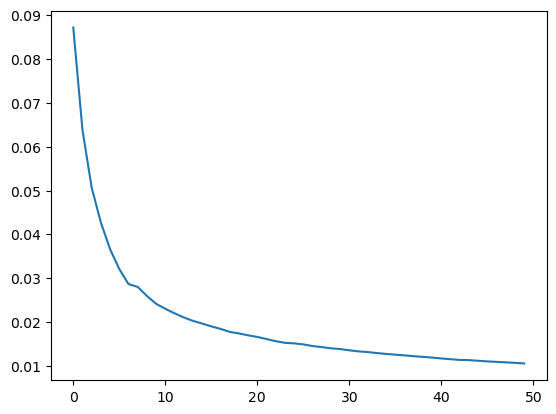

In [30]:
plt.plot(combined_stdevs)

In [31]:
stdev_mean = np.mean(stdev)
N = np.arange(1, 51)
theoretical_stdevs = stdev[0] / np.sqrt(N)

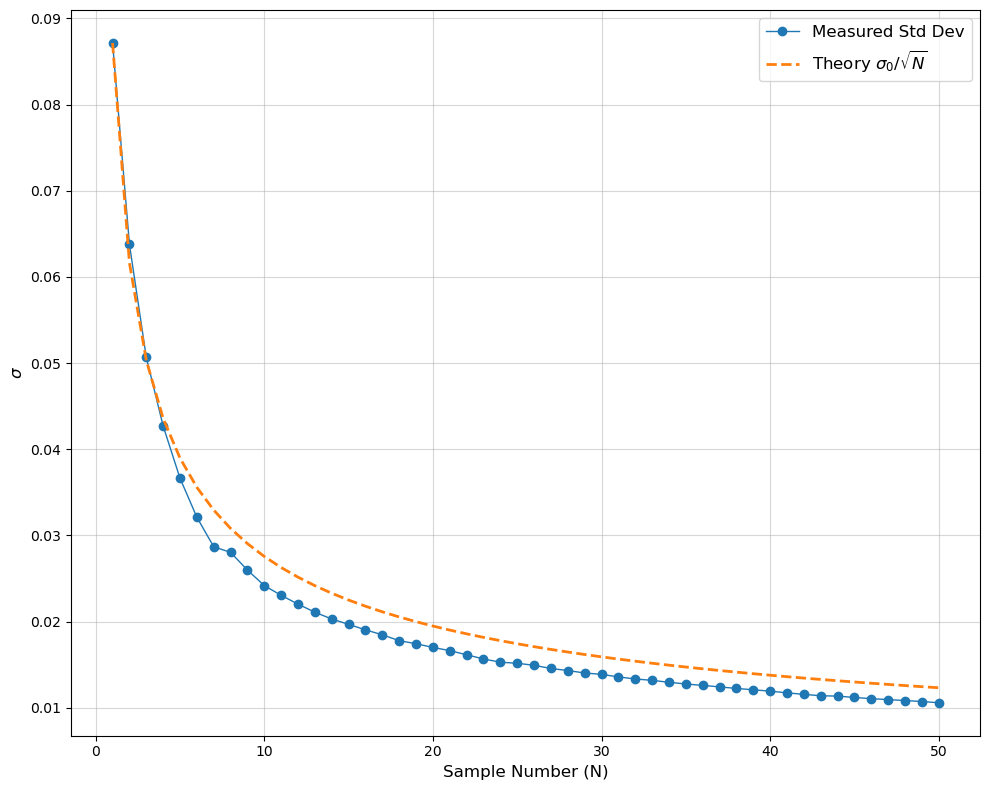

In [41]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 51), combined_stdevs, label='Measured Std Dev', marker='o', linestyle='-', linewidth=1)
plt.plot(range(1, 51), theoretical_stdevs, label=r'Theory $\sigma_{0}/\sqrt{N}$', linestyle='--', linewidth=2)
# Labels, legend, and title
plt.xlabel('Sample Number (N)', fontsize=12)
plt.ylabel(rf'$\sigma$', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

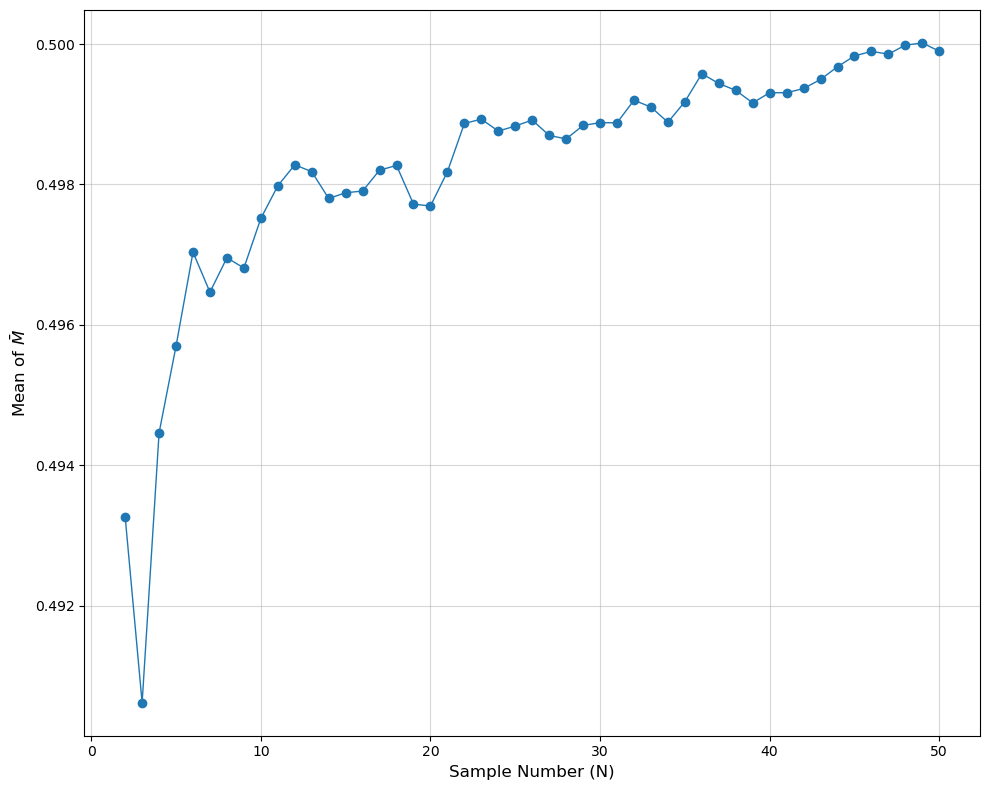

In [40]:
combined_means = []
for i in range(len(mean)):
    combined_mean = np.mean(mean[:i])
    combined_means.append(combined_mean)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 51), combined_means, label='Mean', marker='o', linestyle='-', linewidth=1)
# Labels, legend, and title
plt.xlabel('Sample Number (N)', fontsize=12)
plt.ylabel(rf'Mean of $\bar M$', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()